### PPO Implementation on Lunar Lander environment using RLlib
### Alessandro Alviani - alessandro.alviani@city.ac.uk
### Dimitrios Megkos - dimitrios.megkos@city.ac.uk

The PPO algorithm was implemented using Ray RLlib on the OpenAI Gym Environment: Lunar Lander

#### Import Libraries

In [1]:
# Visualization imports
import matplotlib.pyplot as plt
# Ray and RLlib import
import ray
# Import a Trainable (one of RLlib's built-in algorithms):
import ray.rllib.agents.ppo as ppo # PPO Algorithm

#### Load default configuration and change parameters

In [3]:
# based on lab 07 material
ppo_config = ppo.DEFAULT_CONFIG.copy() # copy the default configuration

# Choose framework
ppo_config["framework"] = "torch" # set pytorch

# Environment setting
ppo_config["env"] = "LunarLander-v2" # LunarLander from OpenAI Gym

# Training settings
ppo_config["lr"] = 0.001 # the learning rate
# neural network architecture
ppo_config["model"] = {
    "fcnet_hiddens": [32,32], # hidden layers and neurons
    "fcnet_activation": "linear" # activation function
}
# Exploration Settings
ppo_config["explore"] = True
ppo_config["exploration_config"] = {
    "type": "StochasticSampling"
}
# Evaluation Settings
ppo_config["evaluation_duration"] = 5
ppo_config["evaluation_duration_unit"] = "episodes"
ppo_config["evaluation_num_workers"] = 1
ppo_config["evaluation_config"] = {
    "render_env": True,
    "explore": False,
}
# Resource Settings
ppo_config["num_gpus"] = 0
ppo_config["num_cpus_per_worker"] = 1

#### Train PPO Trainer

In [3]:
# based on lab 07 material
# initialise ray
ray.init()

# create our RLlib Trainer.
ppo_agent = ppo.PPOTrainer(config=ppo_config)

# create list to store rewards
ppo_avg_rewards = []

# begin training
for i in range(50):
    # Perform one iteration of training the policy with DQN
    result = ppo_agent.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    ppo_avg_rewards.append(result['episode_reward_mean'])

2022-04-20 20:12:27,962	INFO services.py:1412 -- View the Ray dashboard at http://127.0.0.1:8265
2022-04-20 20:12:31,569	WARNING trainer.py:2347 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-04-20 20:12:31,571	INFO ppo.py:249 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2022-04-20 20:12:31,571	INFO trainer.py:779 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-04-20 20:12:32,908	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-04-20 20:12:32,908	WARNING trainer.py:2347 -- You have specified 

-183.04556853923742
-165.8394753462788
-153.45996959954866
-146.65110893172488
-131.09945448903346
-140.8902431263759
-132.9459810350038
-124.32291093312102
-109.8856436322202
-90.32204458139859
-68.49888691471476
-51.46861014658593
-47.41790033276456
-50.44706572335351
-51.4560472220311
-46.91478109893111
-43.87973794767229
-45.536730330573576
-37.83821304486864
-51.02406342112563
-47.365202859936005
-52.0823743006126
-52.83816927775186
-50.68179497300291
-50.88423758379716
-36.648375272751146
-37.799695718245054
-45.7301017177828
-51.40944233853542
-44.034784263889215
-27.106279199932537
-29.753629417095294
-34.69300875551924
-40.54422644242287
-58.19031412400278
-55.7576897576254
-67.59906624168647
-55.245746782858184
-61.42868410698823
-45.786434237032516
-46.5938352389612
-35.398563853021955
-37.75025574222145
-31.50348963070189
-26.951574493635526
-28.7807665419684
-25.045941408783815
-23.803775043072473
-20.03284633082973
-16.804886616995937


#### Plot PPO Rewards

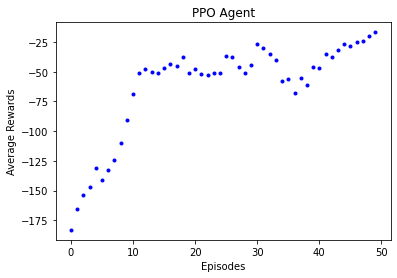

In [4]:
# plot the rewards of agent 1
plt.title("PPO Agent")
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
ppo_r=plt.plot(ppo_avg_rewards, 'b.')

#### Play the Game and Evaluate

In [5]:
# evaluate agent for 5 episodes
ppo_agent.evaluate()
# shutdown ray
ray.shutdown()
#show agent_1 evaluation metrics
ppo_agent.evaluation_metrics

{'evaluation': {'episode_reward_max': -48.91031093714949,
  'episode_reward_min': -196.96654140575785,
  'episode_reward_mean': -85.2119269865243,
  'episode_len_mean': 115.8,
  'episode_media': {},
  'episodes_this_iter': 5,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [-196.96654140575785,
    -50.732946942923014,
    -48.91031093714949,
    -65.94235703186516,
    -63.50747861492594],
   'episode_lengths': [249, 96, 80, 94, 60]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.16737066466232825,
   'mean_inference_ms': 0.7357601461739375,
   'mean_action_processing_ms': 0.037945961130076436,
   'mean_env_wait_ms': 0.22187972890919655,
   'mean_env_render_ms': 16.486269030077704},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

Training the agent on fifty iterations returned an average training reward of -16.80, up from an initial average training reward of -183. The plot shows the agent is learning and we expect the model will keep improving by increasing the number of training iterations. 
The agent evaluation on five episodes returned a mean episode reward of -85.

#### Architecture and hyperparameters optimization
In the cell below we:
 - increased the number of iterations: from 50 to 200
 - added more hidden neurons to each layer: from 32 to 64
 - changed activation function: from linear to ReLU
 - decreased the learning rate: from 0.001 to 0.0001

In [2]:
# based on lab 07 material
ppo_config = ppo.DEFAULT_CONFIG.copy() # copy the default configuration

# Choose framework
ppo_config["framework"] = "torch" # set pytorch

# Environment setting
ppo_config["env"] = "LunarLander-v2" # LunarLander from OpenAI Gym

# Training settings
ppo_config["lr"] = 0.0001 # the learning rate
# neural network architecture
ppo_config["model"] = {
    "fcnet_hiddens": [64,64], # hidden layers and neurons
    "fcnet_activation": "relu" # activation function
}
# Exploration Settings
ppo_config["explore"] = True
ppo_config["exploration_config"] = {
    "type": "StochasticSampling"
}
# Evaluation Settings
ppo_config["evaluation_duration"] = 5
ppo_config["evaluation_duration_unit"] = "episodes"
ppo_config["evaluation_num_workers"] = 1
ppo_config["evaluation_config"] = {
    "render_env": True,
    "explore": False,
}
# Resource Settings
ppo_config["num_gpus"] = 0
ppo_config["num_cpus_per_worker"] = 1

#### Training the PPO Agent

In [3]:
# based on lab 07 material
# initialise ray
ray.init()

# create our RLlib Trainer.
ppo_agent = ppo.PPOTrainer(config=ppo_config)

# create list to store rewards
ppo_avg_rewards = []

# begin training
for i in range(200):
    # Perform one iteration of training the policy with DQN
    result = ppo_agent.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    ppo_avg_rewards.append(result['episode_reward_mean'])

2022-04-20 20:35:56,861	INFO services.py:1412 -- View the Ray dashboard at http://127.0.0.1:8265
2022-04-20 20:35:59,413	WARNING trainer.py:2347 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-04-20 20:35:59,415	INFO ppo.py:249 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2022-04-20 20:35:59,416	INFO trainer.py:779 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-04-20 20:36:00,605	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-04-20 20:36:00,606	WARNING trainer.py:2347 -- You have specified 

-197.21366791781733
-184.94749155126982
-162.4880308185099
-136.74975010776453
-121.39607656610356
-110.6031179518207
-97.85391948953007
-72.41645864476261
-73.3090285307518
-68.7427816808708
-58.19292857901161
-50.279543553578534
-45.726307422059854
-37.2915672877457
-33.603718778114214
-28.4738301531513
-22.807589630562163
-22.088263530286472
-13.250492337909892
-5.782938846276974
2.4914114412346904
6.7738415089066155
18.115394305060313
26.661643764143697
38.09131652635957
52.590692722752244
75.78862418665392
93.6191031657765
112.15827228526534
128.17954998078278
150.54705199450092
161.69398714005794
162.1107733427962
167.27299569946845
179.6378932371005
168.9153461567753
176.05437797868188
177.56676639272973
180.899166011306
184.8274047130174
196.8442527245489
201.92882112905926
196.70421967300442
203.69519651374085
209.43030961157638
208.33069442204666
217.69161063506442
221.4768854472209
223.7180754801493
219.7321988254545
228.0130977287696
229.5566703380244
227.13443268099937
227

#### Plot PPO Rewards

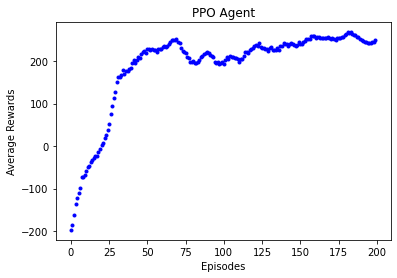

In [4]:
# plot the rewards of agent 1
plt.title("PPO Agent")
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
ppo_r=plt.plot(ppo_avg_rewards, 'b.')

#### Play the Game and Evaluate

In [5]:
# evaluate agent for 5 episodes
ppo_agent.evaluate()
# shutdown ray
ray.shutdown()
#show agent_1 evaluation metrics
ppo_agent.evaluation_metrics

{'evaluation': {'episode_reward_max': 284.8348203507567,
  'episode_reward_min': 163.2844277081189,
  'episode_reward_mean': 250.58314113528596,
  'episode_len_mean': 418.2,
  'episode_media': {},
  'episodes_this_iter': 5,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [284.8348203507567,
    163.2844277081189,
    259.8906202710482,
    281.80117146538663,
    263.10466588111933],
   'episode_lengths': [275, 1000, 232, 231, 353]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.15922919286140746,
   'mean_inference_ms': 0.8781022369063833,
   'mean_action_processing_ms': 0.03863782773282286,
   'mean_env_wait_ms': 0.23275898701830072,
   'mean_env_render_ms': 15.583472201746691},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

#### Conclusions

The optimized model resulted in a much more effective PPO Agent. Over just 200 training iterations, the model in evaluation reached an average training rewards of 250 points. 
The smaller learning rate helped achieve a steadier training, and the higher number of hidden neurons perfected the agent's movement, hence generated higher rewards. 
The model in training plateaud after about 75 games (as shown in the rewards plot), indicating that the training could be early-stoppped and the agent successfuly trained with less than 100 training iterations. 
In evaluation, the agent collected a mean episode reward of 250 points over five episodes, a nearly maximum score, and result of an agent that carried out an almost perfect landing (right in the middle of the goal) at each attempt.